# European data portal - Metadata quality
* This [Jupyter Notebook](https://github.com/salgo60/open-data-examples/blob/master/European%20data%20portal%20-%20quality%20of%20Metadata.ipynb)
* [SPARQL manager](https://www.europeandataportal.eu/sparql-manager/sv/)  
* [DCAT Spec](https://www.w3.org/TR/vocab-dcat-2/) Data Catalog Vocabulary (DCAT) - Version 2
* in Swedish [input to the DCAT-AP-SE](https://github.com/DIGGSweden/DCAT-AP-SE/issues/72#issuecomment-653731898) that we need better version management and use DOI for datasets. Now with copy datasets everywhere we get a chaos to understand what data we use and if we can trust it. Compare [ORCID usage video](https://www.youtube.com/watch?v=a1Rijk_TMHA) 
  * the same challenge is with the data that every piece of data need something like [Linked data]() to explain what e.g. a label Stockholm does it stands for
    * a city = [Q94385](https://www.wikidata.org/wiki/Q94385)
    * a Municipality = [Q506250](https://www.wikidata.org/wiki/Q506250)
    * a county = [Q104231](https://www.wikidata.org/wiki/Q104231)
    * and is language label 
      * **zh** [斯德哥尔摩](https://www.wikidata.org/wiki/Q1754?uselang=zh) 
      * same as **ar** [ستوكهولم](https://www.wikidata.org/wiki/Q1754?uselang=zh) 
      * same as **sv** [Stockholm](https://www.wikidata.org/wiki/Q1754?uselang=sv)
    
**Problem 1:** Strings not Things metadata is nit handled with care keywords is not Linked data and language dependent

European Data Portal Helpdesk / Improvement and suggestions **DESK-7510**
```
 Things not Strings
 Issue Type:	Improvement and suggestions Improvement and suggestions
 Assignee:	EDP Helpdesk
 Created:	24/Jun/20 6:10 PM
 Priority:	Medium Medium
 Reporter:	EDP Helpdesk
 I think you should use Things not strings when describing the data
```

e.g. https://www.europeandataportal.eu/data/api/datasets/https-catalog-skl-se-store-1-resource-38.jsonld?useNormalizedId=true&locale=en
you have keywords with a language tag why not a knowledgetag

```
keyword:
@language: "sv",@value: "Telefonnummer"
@language: "sv",@value: "Kommuner"
@language: "sv", @value: "E-postadresser"
....
```
Much better use Linked data and things
* "Telefonnummer" same as https://www.wikidata.org/wiki/Q214995
* "Kommuner" same as https://www.wikidata.org/wiki/Q127448
* "E-postadresser" same as https://www.wikidata.org/wiki/Q9158

```
Regards
Magnus Sälgö
++46705937578
Stockholm, Sweden
salgo1960@gmail.com
```
----
**Answer**
Dear Magnus,
Thank you for contacting European Data Portal Helpdesk.

We have gotten the following comments from the responsible team:
"Thanks for your comments. We store the metadata as it comes from the data providers, so it is not on us to change that. Besides that, DCAT-AP defines keywords as literals."

Please let me know if you need further assistance from our services.

Best regards, [Pernille Schnoor Clausen](https://www.linkedin.com/in/pernille-schnoor-clausen-38515a2)
EDP Helpdesk


### Fostering  an Open Data Echosystem to deliver good data and metadata about datasets
In Sweden I see a rather naive approach to open data and governancen of open data. We have since [2012 tried getting museums Digital](http://www.digisam.se/linked-open-data/). They started speaking about linked data 2012 and today 2012 they sends around text strings to Europeana --> they cat even identify an artist at museum A is the same artist B at museum B see blogpost. 

Things I see or miss 
1. Good metadata about the datasets and someone who takes responsibilty... if this was business critical data no one should accept "we store the metadata as is .... so it is not on us to change that."
  1. You **get reposiblities** and you **take responsiblities** we dont need gatekeepers adding no value
1. We miss dicussion platforms if we in Sweden should get data we need to contact 290 municipial units by phone.... **this will not scale** People are spending time on "Linked in" likeing each other instead of using real system for [Public backlogs](https://www.youtube.com/watch?v=502ILHjX9EE) were we can ask question and track issues 
1. An urgency for delivering good quality
1. 

## Check the data quality at European Data Portal



In [41]:
# Number of Categories / themes abd theur number of datasets 

import sys
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url ="https://data.europa.eu/euodp/sparqlep"

query = """#European Data portal 
PREFIX dcat: <http://www.w3.org/ns/dcat#>
PREFIX dc: <http://purl.org/dc/terms/>

SELECT ?theme (count(?s) AS ?count) 
WHERE {?s a dcat:Dataset . ?s dcat:theme ?theme} 
GROUP BY ?theme LIMIT 10000"""


def get_results(endpoint_url, query):
    user_agent = "salgo60/%s.%s" % (sys.version_info[0], sys.version_info[1])
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()


results = get_results(endpoint_url, query)

for result in results["results"]["bindings"]:
    theme = result["theme"]["value"].replace("http://publications.europa.eu/resource/authority/data-theme/","")
    value = result["count"]["value"] 
    print(theme, value)


ECON 2560
GOVE 2666
JUST 353
INTR 429
TRAN 747
HEAL 2700
EDUC 2954
ENVI 2903
AGRI 941
SOCI 3636
TECH 2655
ENER 1009
REGI 1561


In [42]:
# PREFIX dcat: <http://www.w3.org/ns/dcat#>

query2 = """#Get datasets with MP in the name 
PREFIX dcat: <http://www.w3.org/ns/dcat#>
PREFIX dc: <http://purl.org/dc/terms/>

SELECT ?DatasetURI ?title WHERE { 
?DatasetURI a dcat:Dataset .
?DatasetURI dc:title ?title
FILTER (lang(?title)='en')
FILTER(regex(?title, "MP", "i"))
} limit 100"""

results = get_results(endpoint_url, query2)

for result in results["results"]["bindings"]:
    #print(result)
    ds = result["DatasetURI"]["value"]
    title = result["title"]["value"] 
    print( title, "\n\t",ds)


Gender employment gap by NUTS 2 regions 
	 http://data.europa.eu/88u/dataset/YHvFUmXqU4LhS4fExi9CnA
Gender employment gap by degree of urbanisation 
	 http://data.europa.eu/88u/dataset/sOx8fxyrYRoKlWkdPNA
Implementation report and country fiches on the Environment Liability Directive (ELD) 
	 http://data.europa.eu/88u/dataset/implementation-report-and-country-fiches-on-the-environment-liability-directive-eld
Employment in the EU environmental economy by environmental protection and resource management activities 
	 http://data.europa.eu/88u/dataset/GcXikOlwIaw0BJG3nTHeog
Implementation report under the Landfill Directive 
	 http://data.europa.eu/88u/dataset/implementation-report-under-the-landfill-directive
INSPIRE Implementation report and country fiches in relation to the infrastructure for geospatial data 
	 http://data.europa.eu/88u/dataset/inspire-implementation-report-and-country-fiches-in-relation-to-the-infrastructure-for-geospatial-data
Atmospheric Particles-DMPS Particle Conc

In [43]:
import json
import pandas as pd
def get_sparql_dataframe(endpoint_url, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    user_agent = "salgo60/%s.%s" % (sys.version_info[0], sys.version_info[1])
 
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']

    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

In [44]:
# retrieves all datasets format  and, if available, retrieves the starting  
# date of the temporal coverage period of the datasets. 
querybase = """#Get datasets format and if coverage period
PREFIX dcat: <http://www.w3.org/ns/dcat#>
PREFIX dc: <http://purl.org/dc/terms/> 
PREFIX odp: <https://data.europa.eu/euodp/ontologies/ec-odp#>

SELECT distinct ?DatasetURI ?title ?period ?keyword ?conformsTo 
?LandingPage ?relatedResource ?accessRights ?created ?modified ?license
?Taxanomy ?description WHERE { 
?DatasetURI a dcat:Dataset .
OPTIONAL {?DatasetURI dcat:distribution ?o} .
OPTIONAL {?DatasetURI dcat:landingPage ?LandingPage }
OPTIONAL {?DatasetURI dct:relation ?relatedResource }
OPTIONAL {?DatasetURI dct:conformsTo  ?conformsTo }
OPTIONAL {?DatasetURI dct:accessRights ?accessRights }
OPTIONAL {?DatasetURI dct:created  ?created }
OPTIONAL {?DatasetURI dct:modified  ?modified }
OPTIONAL {?DatasetURI dct:license  ?license }
OPTIONAL {?DatasetURI dcat:themeTaxonomy  ?Taxanomy }
OPTIONAL {?DatasetURI dct:description ?description}  
?DatasetURI dc:title ?title
 {
   ?DatasetURI dc:temporal ?period .
    ?DatasetURI dcat:keyword ?keyword.
#   ?period odp:periodStart ?period_start
   }
FILTER (lang(?title)='en')
}"""  

query3 = querybase + "  limit 40"

results = get_results(endpoint_url, query3)

for result in results["results"]["bindings"]:
    #print(result)
    ds = result["DatasetURI"]["value"]
    title = result["title"]["value"] 
    keyword = result["keyword"]["value"] 
    LandingPage = result["LandingPage"]["value"]
     
    try:
        created = result["created"]["value"]
    except:
        created = ""
    try:
        relatedResource = result["relatedResource"]["value"]
    except:
        relatedResource = ""
    try:
        conformsTo = result["conformsTo"]["value"]
    except:
        conformsTo = ""
    try:
        accessRights = result["accessRights"]["value"]
    except:
        accessRights = ""
    try:
        modified = result["modified"]["value"]
    except:
        modified = ""
    try:
        license = result["license"]["value"]
    except:
        license = ""
    try:
        taxanomy = result["Taxanomy"]["value"]
    except:
        taxanomy = ""
    try:
        description = result["description"]["value"]
    except:
        description = ""

    #dsFormat = result["format"]["value"] 
    print( title, "\n\t",ds, "\n\t",keyword,"\n\tLanding: ",
          LandingPage,  "\n\tRelated resource:",relatedResource,
          "\n\tConformsTo:",conformsTo,
          "\n\tAccess rights:",accessRights, 
          "\n\tCreated:",created,
          "\n\tModified:",modified, 
          "\n\tLicense:",license,
          "\n\tTaxanomy:",taxanomy,
        
          )


Members of the European Parliament (MEPs) 
	 http://data.europa.eu/88u/dataset/members-of-the-european-parliament 
	 European Parliament 
	Landing:  http://data.europa.eu/88u/document/176fb3a4-917b-4468-a14e-dab75a745a97 
	Related resource: https://data.europa.eu/euodp/en/data/dataset/eu-whoiswho-the-official-directory-of-the-european-union/resource/3f3433d4-0604-4682-a46a-c3d7c756358f 
	ConformsTo:  
	Access rights:  
	Created:  
	Modified: 2018-12-21 10:06:40.664007 
	License:  
	Taxanomy: 
Members of the European Parliament (MEPs) 
	 http://data.europa.eu/88u/dataset/members-of-the-european-parliament 
	 parliament 
	Landing:  http://data.europa.eu/88u/document/176fb3a4-917b-4468-a14e-dab75a745a97 
	Related resource: https://data.europa.eu/euodp/en/data/dataset/eu-whoiswho-the-official-directory-of-the-european-union/resource/3f3433d4-0604-4682-a46a-c3d7c756358f 
	ConformsTo:  
	Access rights:  
	Created:  
	Modified: 2018-12-21 10:06:40.664007 
	License:  
	Taxanomy: 
Members of th

In [45]:
#Take down all in a pandas dataset
results = get_sparql_dataframe(endpoint_url, querybase)


In [32]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12247 entries, 0 to 12246
Data columns (total 13 columns):
DatasetURI         12247 non-null object
title              12247 non-null object
period             12247 non-null object
keyword            12247 non-null object
conformsTo         7 non-null object
LandingPage        12224 non-null object
relatedResource    181 non-null object
accessRights       0 non-null object
created            0 non-null object
modified           11109 non-null object
license            0 non-null object
Taxanomy           0 non-null object
description        12247 non-null object
dtypes: object(13)
memory usage: 1.2+ MB


### We have 12247 datasets if the query is ok
* no accessRiughts
* no created
* no license
* no Taxanomy
* some keywords in english

In [48]:
#Check metadata keywords
results.keyword.value_counts()

international trade               336
agriculture                       334
COVID-19                          229
coronavirus                       229
accountability                    207
                                 ... 
automated mobility                  1
economic and financial affairs      1
excise-duties-tax                   1
Facial Dysostosis                   1
term                                1
Name: keyword, Length: 1817, dtype: int64

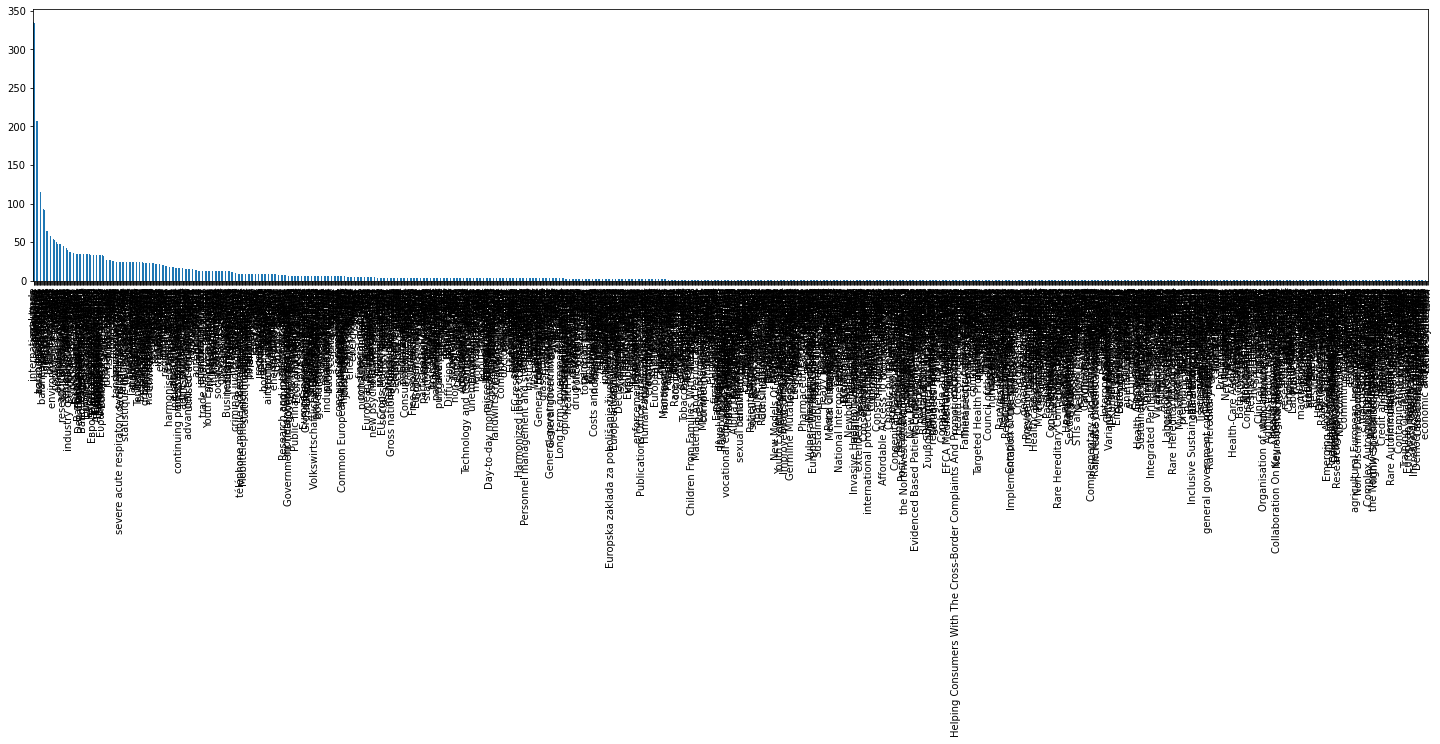

In [49]:
%matplotlib inline  
import matplotlib.pyplot as plt   
plot = results.keyword.value_counts().plot.bar(y='counts', figsize=(25, 5)) 
plt.show()

Feels we lack a standard of keywords most are just used once

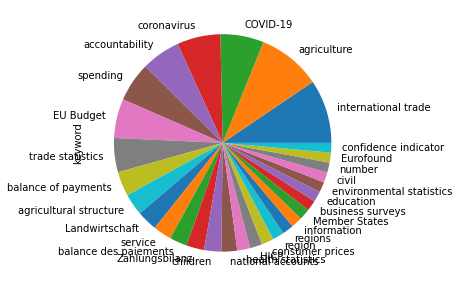

In [50]:
# Pie of top 30 crazy that a specific keyword like COVID-19 is reused but bad managament 
#that we dont have that for other fields
plot = results.keyword.value_counts()[0:30].plot.pie(y='counts', figsize=(25, 5)) 
plt.show()

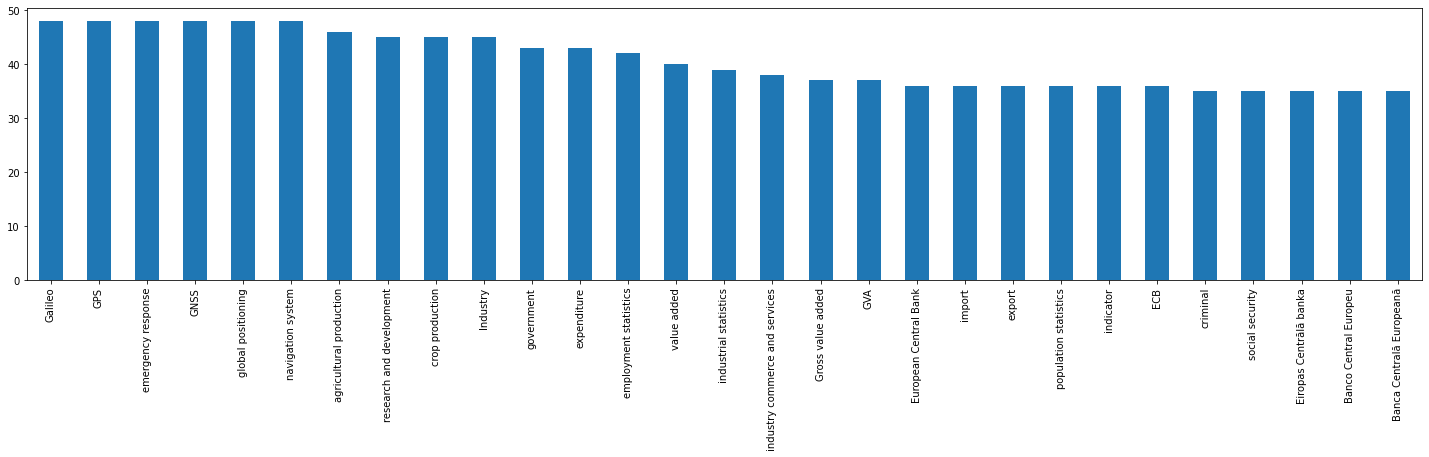

In [51]:
# 31-60
plot = results.keyword.value_counts()[31:60].plot.bar(y='counts', figsize=(25, 5)) 
plt.show()

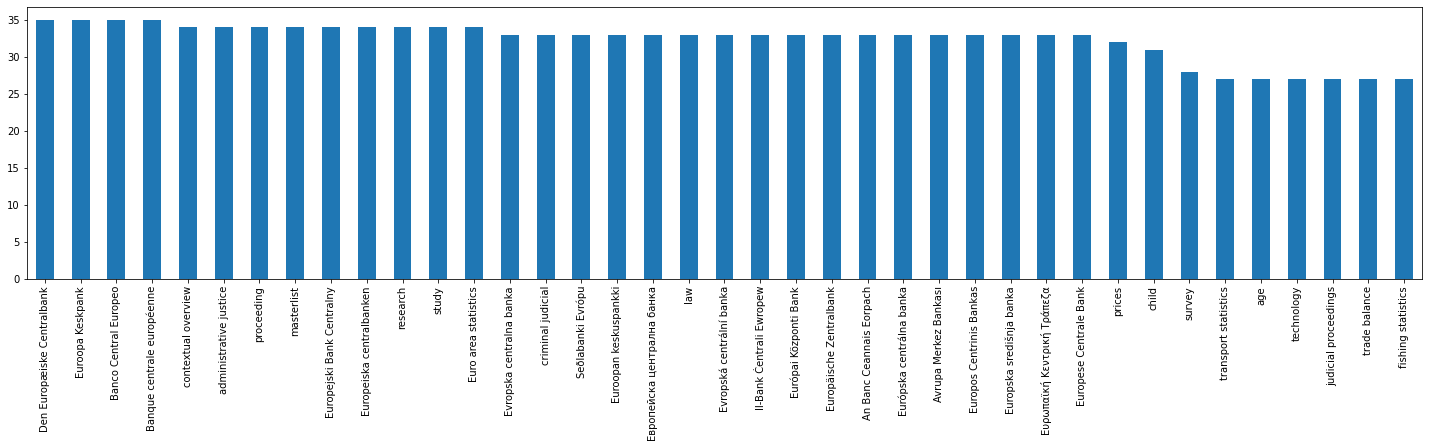

In [52]:
# 61-100
plot = results.keyword.value_counts()[61:100].plot.bar(y='counts', figsize=(25, 5)) 
plt.show()

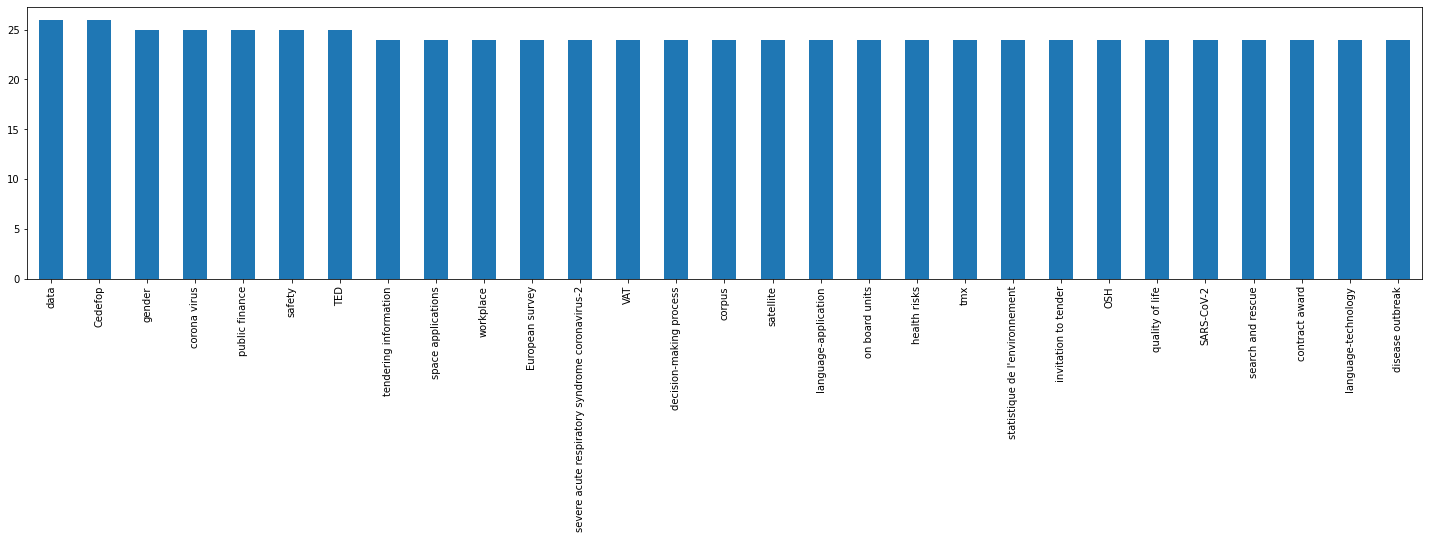

In [53]:
# 101-130
plot = results.keyword.value_counts()[101:130].plot.bar(y='counts', figsize=(25, 5)) 
plt.show()

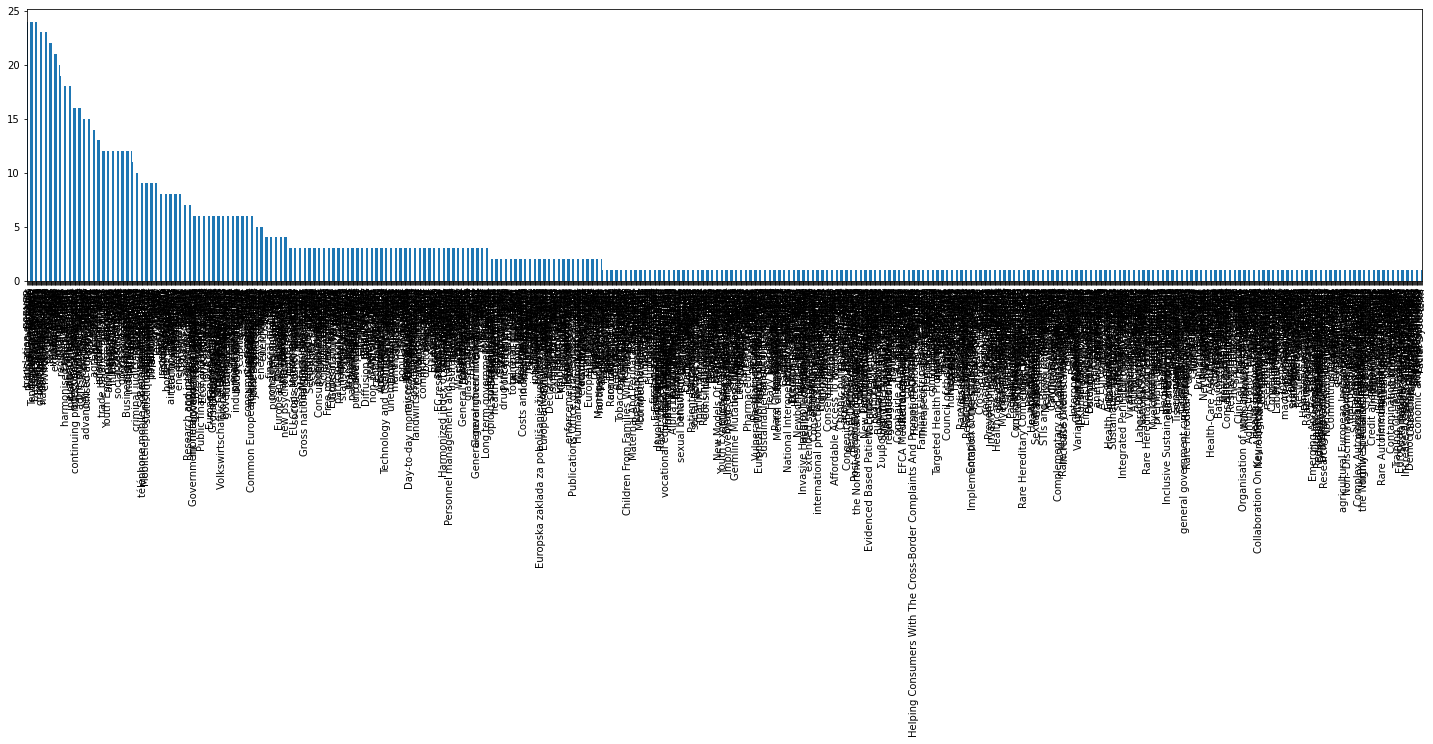

In [54]:
# 131-
plot = results.keyword.value_counts()[131:].plot.bar(y='counts', figsize=(25, 5)) 
plt.show()